In [2]:
#import required libraries
import pandas as pd
#import required libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [29]:
data=pd.read_csv('iphone_purchase_records.csv')
# 1: Purchased an iPhone (Positive class)
# 0: Not purchased iPhone (Negative class)

In [30]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [31]:
data.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [32]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [34]:
data.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [35]:
data['Purchase Iphone'].value_counts()
# 1: Purchased an iPhone (Positive class)
# 0: Not purchased iPhone (Negative class)

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [36]:
# Data Preprocessing 
# Independent and dependent variable 
# Label encoding 
# Train and test test 
# Feature scaling 

In [37]:
# Independent features 
X=data.iloc[:,:-1].values
# Coverts data into array -- use of .values (numpy array)
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [38]:
X.shape

(400, 3)

In [39]:
type(X)

numpy.ndarray

data.iloc is used to access the data within the DataFrame data using integer-based indexing. The .iloc attribute allows you to access data by its position, rather than by labels.

[:,:-1] is a slicing operation used to select all rows (: before the comma) and all columns except the last one (:-1 after the comma). The :-1 notation means "from the beginning up to, but not including, the last element." This is often done when you have a DataFrame with features (input variables) in the columns, and the last column contains the target variable or the output variable.

.values returns the selected data as a NumPy array. In this case, it extracts the values from the DataFrame slice obtained in the previous step.

Putting it all together, the line of code X = data.iloc[:,:-1].values extracts all the values from the DataFrame data, excluding the last column, and assigns them to the variable X. These values are returned as a NumPy array, which can be used for further computations or as input to machine learning models, for example.






In [40]:
# Dependent feature

y=data.iloc[:,3].values
print(y)
print(type(y))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]
<class 'numpy.ndarray'>


[:,3] is a slicing operation used to select all rows (: before the comma) and a specific column (index 3) indicated by the number after the comma. The column index starts from 0, so [:,3] selects all rows from the DataFrame but only the values from the fourth column (index 3).

.values returns the selected data as a NumPy array. In this case, it extracts the values from the DataFrame slice obtained in the previous step.

Putting it all together, the line of code y = data.iloc[:,3].values extracts all the values from the fourth column of the DataFrame data and assigns them to the variable y. These values are returned as a NumPy array, which can be used for further computations or as the target variable in machine learning models.

In [41]:
# Label encoding needed for column Gender -- Oth index 
# Gender" only 2 values 
# Therefore, label encoding will work without any extra dummy variable 

In [42]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])

In [43]:
type(le)

sklearn.preprocessing._label.LabelEncoder

In [53]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [54]:
# create train set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=32)

In [55]:
y_train.shape

(300,)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 3) (100, 3) (300,) (100,)


In [57]:
X_train

array([[1, 42, 73000],
       [1, 46, 28000],
       [1, 28, 59000],
       [0, 45, 22000],
       [0, 37, 80000],
       [0, 20, 82000],
       [0, 59, 76000],
       [0, 59, 29000],
       [0, 38, 50000],
       [0, 37, 57000],
       [1, 38, 61000],
       [0, 35, 147000],
       [0, 37, 137000],
       [1, 35, 72000],
       [0, 27, 57000],
       [1, 38, 71000],
       [1, 32, 120000],
       [1, 47, 23000],
       [1, 25, 22000],
       [0, 47, 30000],
       [0, 41, 51000],
       [0, 33, 149000],
       [0, 26, 118000],
       [1, 35, 22000],
       [1, 18, 82000],
       [0, 37, 80000],
       [0, 32, 117000],
       [0, 54, 104000],
       [1, 36, 125000],
       [0, 50, 44000],
       [1, 21, 88000],
       [1, 30, 80000],
       [1, 29, 43000],
       [1, 40, 57000],
       [0, 33, 69000],
       [1, 42, 65000],
       [1, 31, 18000],
       [1, 48, 74000],
       [0, 20, 23000],
       [1, 37, 72000],
       [0, 45, 45000],
       [1, 46, 59000],
       [1, 51, 23000],
   

In [58]:
# Apply scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
# Training already done on X_train, 
# therefore, no need to train on X_test
X_test=sc.transform(X_test)

In [59]:
X_train

array([[ 0.99335541,  0.46975084,  0.0793643 ],
       [ 0.99335541,  0.86728328, -1.26326479],
       [ 0.99335541, -0.92161272, -0.33834253],
       [-1.00668904,  0.76790017, -1.442282  ],
       [-1.00668904, -0.02716472,  0.28821771],
       [-1.00668904, -1.71667761,  0.34789011],
       [-1.00668904,  2.15926373,  0.1688729 ],
       [-1.00668904,  2.15926373, -1.23342859],
       [-1.00668904,  0.07221839, -0.60686835],
       [-1.00668904, -0.02716472, -0.39801493],
       [ 0.99335541,  0.07221839, -0.27867013],
       [-1.00668904, -0.22593094,  2.28724324],
       [-1.00668904, -0.02716472,  1.98888122],
       [ 0.99335541, -0.22593094,  0.0495281 ],
       [-1.00668904, -1.02099583, -0.39801493],
       [ 0.99335541,  0.07221839,  0.01969189],
       [ 0.99335541, -0.52408027,  1.48166579],
       [ 0.99335541,  0.96666639, -1.4124458 ],
       [ 0.99335541, -1.21976205, -1.442282  ],
       [-1.00668904,  0.96666639, -1.20359239],
       [-1.00668904,  0.37036773, -0.577

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [61]:
X_test

array([[ 0.99335541,  2.25864684,  0.94461415],
       [-1.00668904, -1.31914516,  0.55674353],
       [-1.00668904, -1.02099583,  0.76559694],
       [-1.00668904,  2.05988062, -0.69637695],
       [-1.00668904,  0.96666639,  2.19773463],
       [-1.00668904,  0.07221839,  0.28821771],
       [-1.00668904, -0.32531405, -1.3527734 ],
       [ 0.99335541,  0.96666639,  1.03412276],
       [-1.00668904,  1.96049751, -1.11408378],
       [ 0.99335541, -0.82222961, -0.27867013],
       [-1.00668904,  0.86728328, -1.442282  ],
       [ 0.99335541, -1.71667761,  0.1092005 ],
       [-1.00668904,  2.05988062, -0.96490277],
       [ 0.99335541, -1.81606072, -0.01014431],
       [-1.00668904, -1.41852827, -0.66654075],
       [ 0.99335541,  0.27098462, -0.33834253],
       [-1.00668904, -1.02099583, -0.36817873],
       [ 0.99335541, -0.12654783,  2.19773463],
       [-1.00668904, -1.12037894, -1.59146301],
       [-1.00668904,  1.86111439,  1.00428656],
       [-1.00668904,  1.46358195, -1.472

In [62]:
y_pred=classifier.predict(X_test)

In [63]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# Evaluate the performance of the model 

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
print(confusion_matrix(y_test, y_pred))

[[54  7]
 [ 3 36]]


In [67]:
import  numpy as np
table = confusion_matrix(y_test, y_pred, labels=[0,1])
print(table)


[[54  7]
 [ 3 36]]


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=table, display_labels=["0-not purchased (neg)", "1-purchased (pos)"])

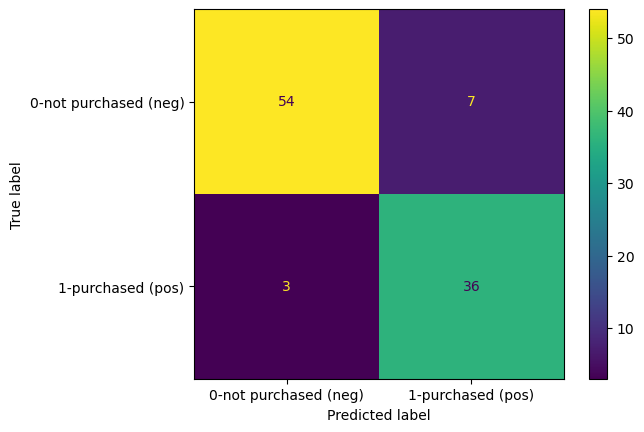

In [70]:
disp.plot()

In [71]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [72]:
print('True negative', tn)
print('False positive', fp)
print('False negative', fn)
print('True positive', tp)

True negative 54
False positive 7
False negative 3
True positive 36


In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9


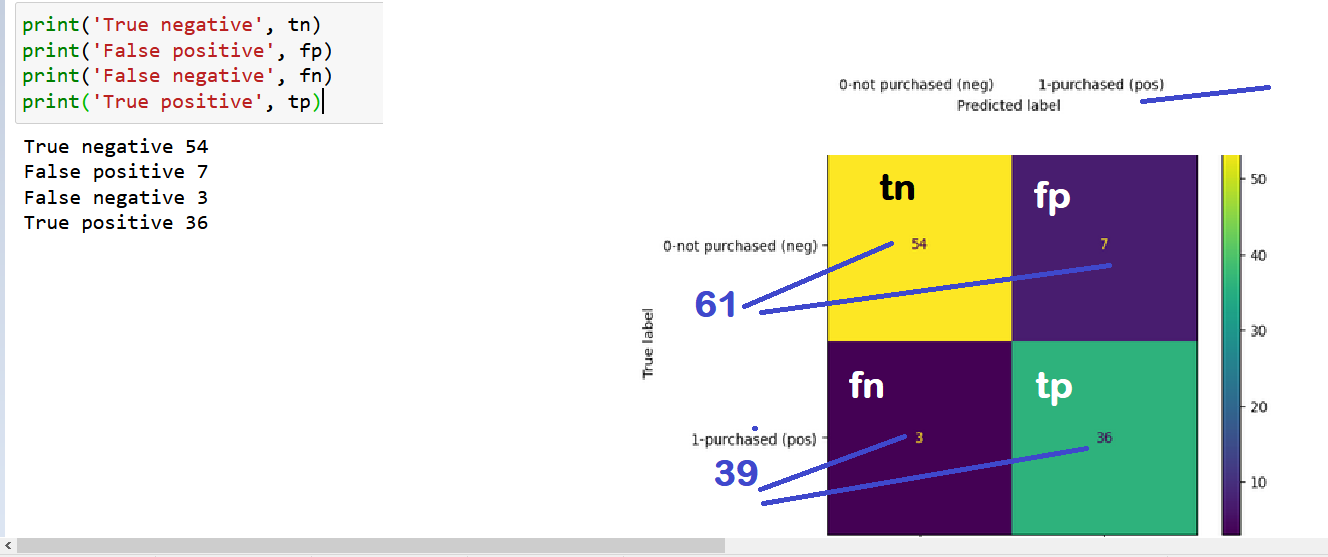

In [76]:
(36)/(36+7)

0.8372093023255814

In [74]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))

0.8372093023255814


In [77]:
(36)/(36+3)

0.9230769230769231

In [75]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))

0.9230769230769231


In [78]:
# Save the model 
import joblib 
joblib.dump(classifier,'naive_bayes.sav')

['naive_bayes.sav']

import joblib imports the joblib module, which provides utilities for saving and loading Python objects, including machine learning models.

joblib.dump(classifier, 'naive_bayes.sav') is the line where the model is being saved. The dump function from the joblib module is called, which takes two arguments: the classifier object (the machine learning model) and the filename 'naive_bayes.sav' where the model will be saved.

classifier represents the machine learning model that you have previously trained and want to save. You should replace classifier with the actual variable name of your trained model.

'naive_bayes.sav' is the filename under which the model will be saved. The .sav extension is a common convention for saved models, but you can choose a different name and extension if you prefer.

After executing the joblib.dump() function, the trained model will be saved to the specified file ('naive_bayes.sav' in this case). This file can later be loaded using joblib.load() to retrieve the model object and use it for predictions or other tasks.

Remember to make sure that you have the joblib library installed before using it. You can install it using pip install joblib.

In [79]:
import joblib 
model=joblib.load('naive_bayes.sav')

In [80]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

O- negative class -- Not bought an iPhone 

1-Positive class -- Bought an iPhone 

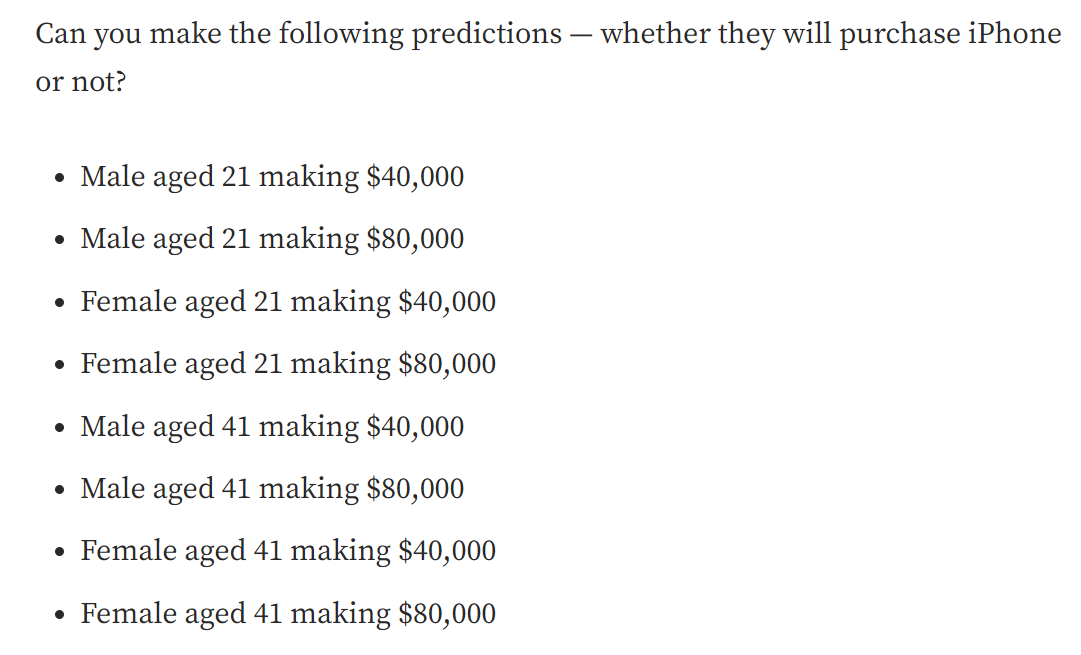

In [81]:
x1 = sc.transform([[1,21,40000]])
x2 = sc.transform([[1,21,80000]])
x3 = sc.transform([[0,21,40000]])
x4 = sc.transform([[0,21,80000]])
x5 = sc.transform([[1,41,40000]])
x6 = sc.transform([[1,41,80000]])
x7 = sc.transform([[0,41,40000]])
x8 = sc.transform([[0,41,80000]])

In [82]:
model.predict(x1)

array([0], dtype=int64)

In [83]:
print("Male aged 21 making $40k will buy iPhone:", classifier.predict(x1))
print("Male aged 21 making $80k will buy iPhone:", classifier.predict(x2))
print("Female aged 21 making $40k will buy iPhone:", classifier.predict(x3))
print("Female aged 21 making $80k will buy iPhone:", classifier.predict(x4))
print("Male aged 41 making $40k will buy iPhone:", classifier.predict(x5))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict(x6))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict(x7))
print("Female aged 41 making $80k will buy iPhone:", classifier.predict(x8))


Male aged 21 making $40k will buy iPhone: [0]
Male aged 21 making $80k will buy iPhone: [0]
Female aged 21 making $40k will buy iPhone: [0]
Female aged 21 making $80k will buy iPhone: [0]
Male aged 41 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [0]
Female aged 41 making $40k will buy iPhone: [0]
Female aged 41 making $80k will buy iPhone: [0]


In [85]:
x9 = sc.transform([[0,51,80000]])
print(classifier.predict(x9))

[1]


In [ ]:
# 1: Purchased an iPhone (Positive class)
# 0: Not purchased iPhone (Negative class)

In [86]:
x44 = sc.transform([[0,60,70000]])
print(classifier.predict(x44))

[1]


In [87]:
x10 = sc.transform([[0,51,30000]])
print(classifier.predict(x10))

[1]


In [88]:
x11 = sc.transform([[0, 21,100000]])
print(classifier.predict(x11))

[0]


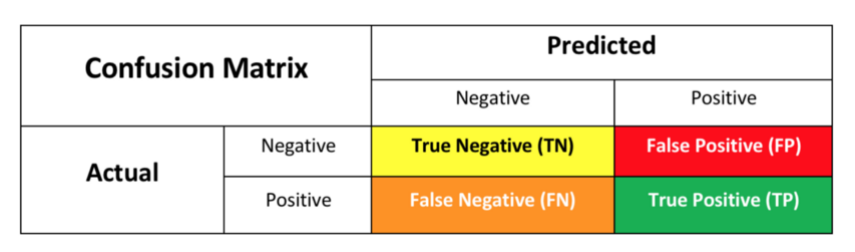

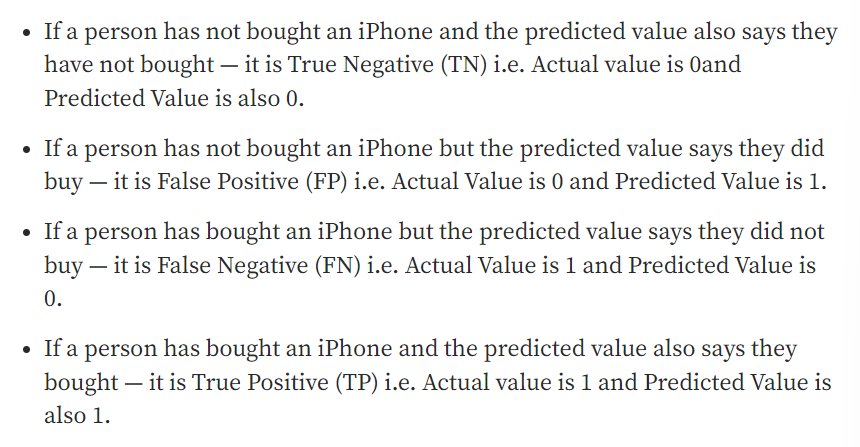

Source: https://towardsdatascience.com/machine-learning-project-10-predict-which-customers-bought-an-iphone-ea7b153db676

https://github.com/omairaasim/machine_learning/blob/master/project_10_logistic_regression/logistic_regression_dec10.py